In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('../../data/processed/processed_data.csv')


In [13]:
# Create custom labels based on keywords in job titles
keywords_to_labels = {
    'analyst': 'Analyst',
    'manager': 'Manager',
    'developer': 'Developer',
    'engineer': 'Engineer',
    'scientist': 'Scientist',
    'architect': 'Architect',
    'consultant': 'Consultant',
    'specialist': 'Specialist',
    'administrator': 'Administrator',
    'manager': 'Manager',
}

In [14]:
# Function to assign labels based on keywords
def assign_label(job_title):
    for keyword, label in keywords_to_labels.items():
        if keyword in job_title.lower():
            return label
    return 'Other'

In [16]:
# Apply the function to create a 'Label' column
dataset['Label'] = dataset['Job Role Title'].apply(assign_label)

In [17]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Job Role Title'])


In [18]:
# K-Means clustering
num_clusters = len(keywords_to_labels)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
dataset['Cluster'] = kmeans.labels_

/Users/v4rsh1th/Downloads/projects/recruitment-analysis/venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Display the distribution of job roles in each cluster
print("Distribution of job roles in each cluster:")
print(dataset['Cluster'].value_counts())

Distribution of job roles in each cluster:
Cluster
3    29
0    27
1    25
2    23
4    21
7    17
5    15
8    12
6     8
Name: count, dtype: int64


In [21]:
# Print job roles in each cluster
for cluster_id in range(num_clusters):
    cluster_jobs = dataset[dataset['Cluster'] == cluster_id]['Job Role Title'].tolist()
    print(f'\nCluster {cluster_id + 1} Job Roles:')
    print(cluster_jobs)


Cluster 1 Job Roles:
['Data Analyst', 'Business Intelligence Analyst', 'Senior Data Analyst', 'Big Data Analyst', 'Data Analyst II', 'Data Analyst', 'Big Data Analyst', 'Junior Data Analyst', 'Data Governance Analyst', 'Big Data Analyst II', 'Data Quality Analyst', 'Big Data Performance Analyst', 'Big Data Analyst III', 'Data Governance Analyst II', 'Big Data Performance Analyst II', 'Big Data Analyst IV', 'Data Analyst II', 'Big Data Analyst II', 'Junior Data Analyst II', 'Data Analyst III', 'Big Data Analyst III', 'Junior Data Analyst III', 'Data Analyst', 'Business Intelligence Analyst', 'Big Data Quality Analyst', 'Data Insights Analyst', 'Security Analyst']

Cluster 2 Job Roles:
['Data Engineer', 'Data Warehouse Engineer', 'Data Engineer II', 'Data Engineer III', 'AI Engineer', 'Data Engineer IV', 'Big Data Engineer', 'Data Engineer', 'Data Engineer II', 'Data Engineer III', 'Data Engineer', 'Big Data Solutions Engineer', 'Senior Data Engineer', 'Big Data DevOps Engineer', 'Big D

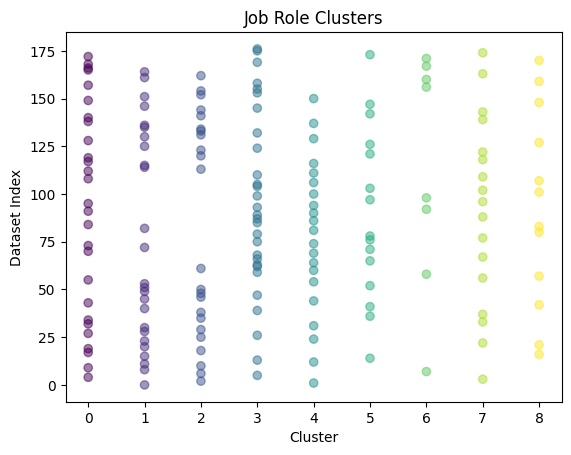

In [23]:
# Visualize the clusters
plt.scatter(dataset['Cluster'], range(len(dataset)), c=dataset['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Job Role Clusters')
plt.xlabel('Cluster')
plt.ylabel('Dataset Index')
plt.show()